# **Preliminary Data Analysis**

This script performs exploratory data analysis (EDA) on the whole dataset and predominantly on the sample of Amazon fashion item reviews (available [here]()):

Whole Dataset:
* Rating distribution (overall and by sentiment)

Training sampe:
* Rating distribution (overall and by sentiment)
* Review length
* Word clouds
* Topic modeling using BERTopic

## Preparations

In [20]:
# Import packages
import re
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from datasets import load_dataset
from langdetect import detect, DetectorFactory
from transformers import set_seed
from collections import Counter
import nltk
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import os

# Download additional files for NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Set seed for reproducible and consistent results
set_seed(42)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load the preprocessed data

In [21]:
# Load sampled training data
with ZipFile('Data/checkpoint3.zip', 'r') as zip1:
    with zip1.open('checkpoint3.csv') as file:
        reviews_sample = pd.read_csv(file)
        file.close()

In [22]:
# Load sampled training 
with ZipFile('Data/checkpoint2.zip', 'r') as zip2:
    with zip2.open('checkpoint2.csv') as file:
        reviews_all = pd.read_csv(file)
        file.close()

# Whole dataset

### Ratings

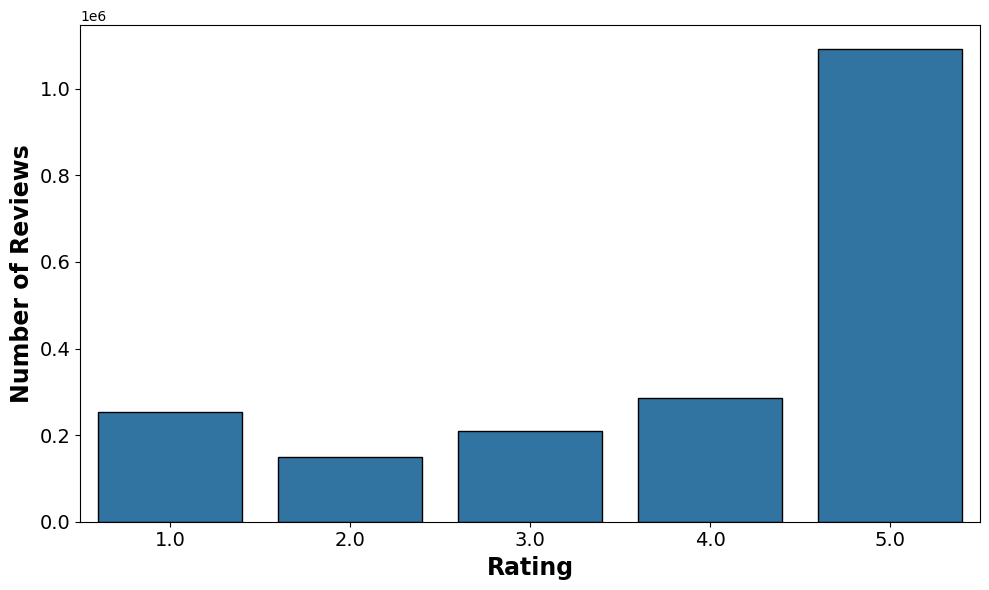

In [23]:
# Extract number of reviews by ratings
ratings = pd.DataFrame(reviews_all['rating'].value_counts())

# Plot number of reviews by ratings
plt.figure(figsize=(10, 6))
sns_barplot = sns.barplot(x='rating', y='count', data=ratings)
for bar in sns_barplot.patches:
    bar.set_edgecolor('black')  # Set the border color
    bar.set_linewidth(1)        # Set the border thickness
#plt.title('Rating Distribution', weight='bold')
plt.xlabel('Rating', weight='bold', fontsize=17)
plt.ylabel('Number of Reviews', weight='bold', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Plots/rating_distribution_all.pdf', format='pdf', dpi=1500)
plt.tight_layout()
plt.show()

### Sentiment distribution by rating

In [24]:
# Replace 1 with 'POS' and 0 with 'NEG'
category_number = reviews_all['label'].value_counts()
print(category_number)

category_percentages = reviews_all['label'].value_counts(normalize=True) * 100
print(category_percentages)

label
1    1418230
0     574921
Name: count, dtype: int64
label
1    71.155171
0    28.844829
Name: proportion, dtype: float64


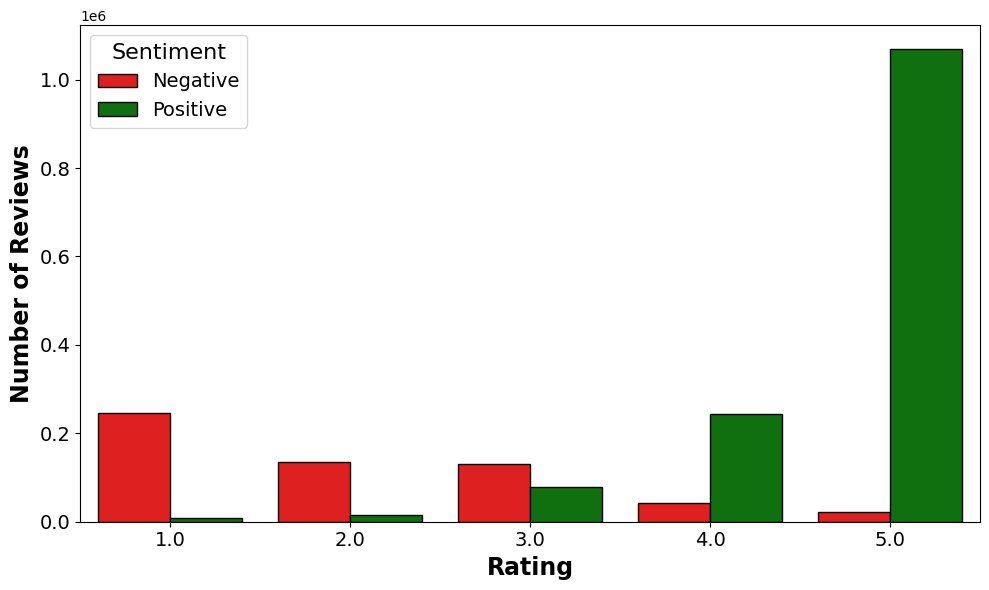

In [26]:
# Extract number of reviews by ratings and sentiment
value_counts = reviews_all.groupby(['rating', 'label']).size().reset_index(name='counts')

# Plot number of reviews by ratings and senitment
plt.figure(figsize=(10, 6))
sns_barplot = sns.barplot(data=value_counts, x='rating', y='counts', hue='label', palette={0: 'red', 1: 'green'})
for bar in sns_barplot.patches:
    bar.set_edgecolor('black')  # Set the border color
    bar.set_linewidth(1)        # Set the border thickness
#plt.title('Rating Distribution', weight='bold')
plt.xlabel('Rating', weight='bold', fontsize=17)
plt.ylabel('Number of Reviews', weight='bold', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['Negative', 'Positive']
plt.legend(title='Sentiment', handles=handles, labels=custom_labels, title_fontsize=16, fontsize=14)
plt.savefig('Plots/rating_distribution_sentiment_all.pdf',format='pdf', dpi=1500)
plt.tight_layout()
plt.show()

# Training Data

## Review length

### Distribution of Review Lengths

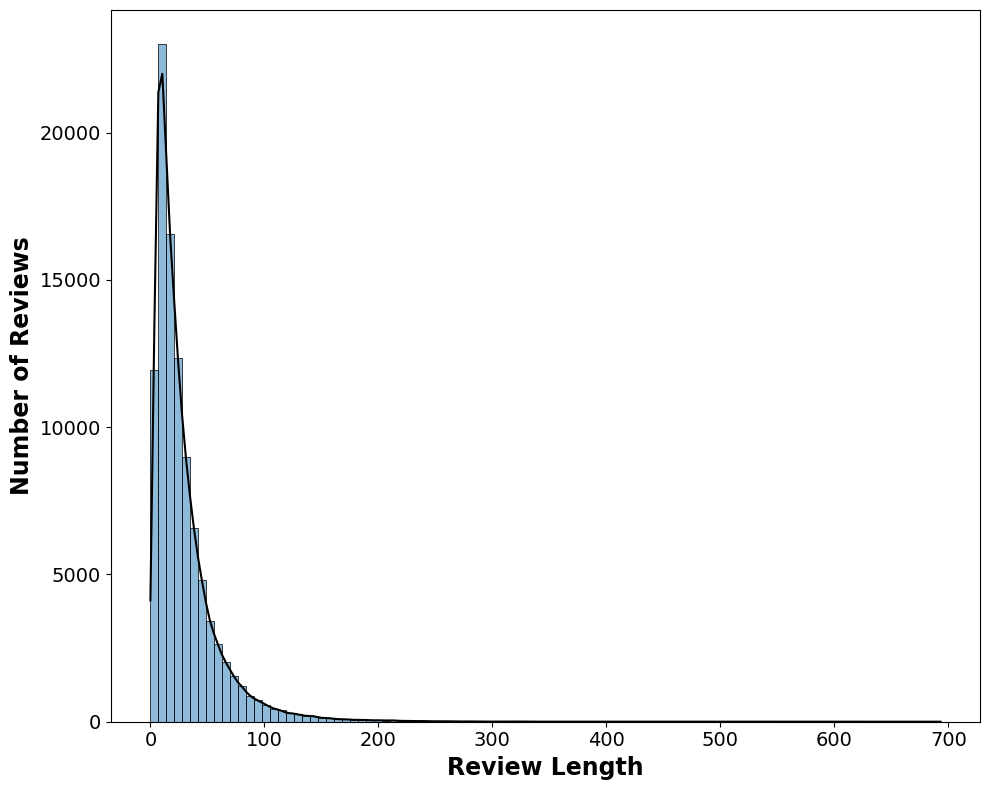

In [5]:
# Tokenize the reviews and determine their lengths
revs = reviews_sample['text'].copy()

doc_lengths = []

for rev in revs:
    tokens = nltk.word_tokenize(rev)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    doc_lengths.append(len(tokens))

doc_lengths = np.array(doc_lengths)

# Plot the distribution of review lengths (Figure A1 in the Appendix)
plt.figure(figsize=(10,8))
ax = sns.histplot(doc_lengths, binwidth=7, kde=True)
ax.lines[0].set_color('black')
plt.xlabel('Review Length', weight='bold', fontsize=17)
plt.ylabel('Number of Reviews', weight='bold', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
os.makedirs('Plots', exist_ok=True)
plt.savefig('Plots/hist_rev_len.pdf', format='pdf', dpi=1500)
plt.tight_layout()
plt.show()

### Review Lengths (Total and by Sentiment)

In [6]:
# Calculations for text in Data chapter 
print('Average length of all reviews: ' + str(np.average(doc_lengths)))
print('Standard deviation of the length of all reviews: ' + str(np.std(doc_lengths)))

# Calculations for footnote in Data chapter
## Length of positive reviews
revs_pos = reviews_sample[reviews_sample['label'] == 1]['text'].copy()

doc_lengths_pos = []

for rev in revs_pos:
    tokens = nltk.word_tokenize(rev)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    doc_lengths_pos.append(len(tokens))

doc_lengths_pos = np.array(doc_lengths_pos)

## Length of negative reviews
revs_neg = reviews_sample[reviews_sample['label'] == 0]['text'].copy()

doc_lengths_neg = []

for rev in revs_neg:
    tokens = nltk.word_tokenize(rev)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    doc_lengths_neg.append(len(tokens))

doc_lengths_neg = np.array(doc_lengths_neg)

## Check average length and SD of length
print('\n')
print('Average length of positive reviews: ' + str(np.average(doc_lengths_pos)))
print('Standard deviation of the length of positive reviews: ' + str(np.std(doc_lengths_pos)))

print('\n')
print('Average length of negative reviews: ' + str(np.average(doc_lengths_neg)))
print('Standard deviation of the length of negative reviews: ' + str(np.std(doc_lengths_neg)))

Average length of all reviews: 28.8799
Standard deviation of the length of all reviews: 30.414444857501504


Average length of positive reviews: 27.0512
Standard deviation of the length of positive reviews: 30.318174888340494


Average length of negative reviews: 30.099033333333335
Standard deviation of the length of negative reviews: 30.417438404072684


## Rating Distribution

### Overall Rating Distribution

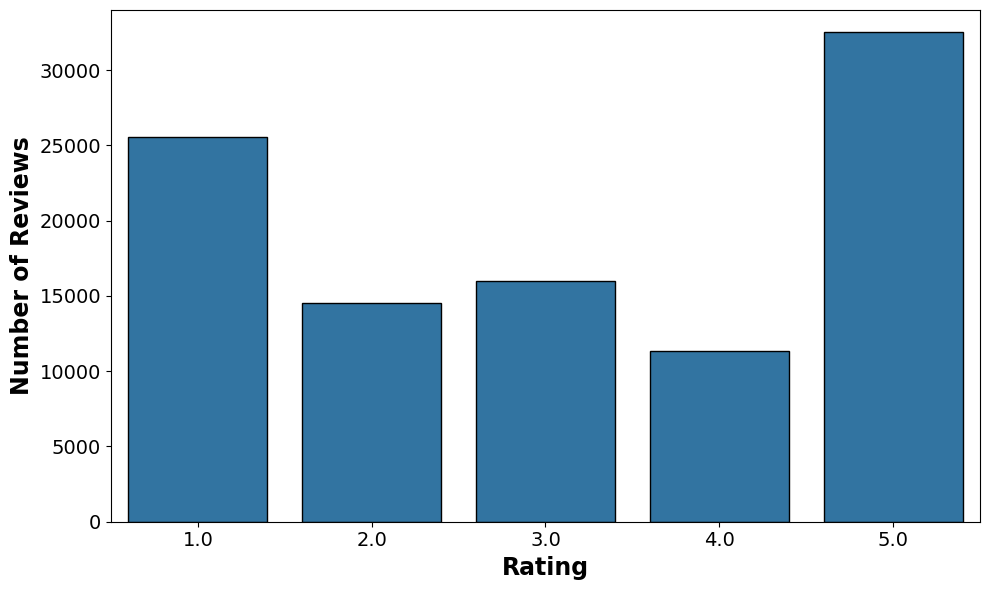

In [7]:
# Extract number of reviews by ratings
ratings = pd.DataFrame(reviews_sample['rating'].value_counts())

# Plot number of reviews by ratings
plt.figure(figsize=(10, 6))
sns_barplot = sns.barplot(x='rating', y='count', data=ratings)
for bar in sns_barplot.patches:
    bar.set_edgecolor('black')  # Set the border color
    bar.set_linewidth(1)        # Set the border thickness
#plt.title('Rating Distribution', weight='bold')
plt.xlabel('Rating', weight='bold', fontsize=17)
plt.ylabel('Number of Reviews', weight='bold', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(top=34000)
plt.savefig('Plots/rating_distribution.pdf', format='pdf', dpi=1500)
plt.tight_layout()
plt.show()

### Rating Distribution by Sentiment

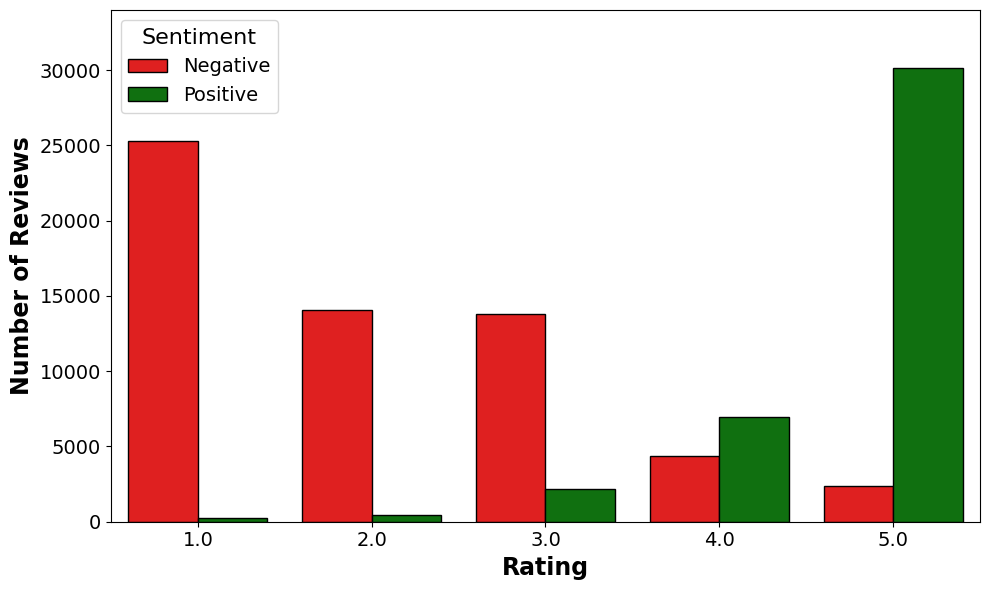

In [8]:
# Extract number of reviews by ratings and sentiment
value_counts = reviews_sample.groupby(['rating', 'label']).size().reset_index(name='counts')

# Plot number of reviews by ratings and senitment
plt.figure(figsize=(10, 6))
sns_barplot = sns.barplot(data=value_counts, x='rating', y='counts', hue='label', palette={0: 'red', 1: 'green'})
for bar in sns_barplot.patches:
    bar.set_edgecolor('black')  # Set the border color
    bar.set_linewidth(1)        # Set the border thickness
#plt.title('Rating Distribution', weight='bold')
plt.xlabel('Rating', weight='bold', fontsize=17)
plt.ylabel('Number of Reviews', weight='bold', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(top=34000)
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['Negative', 'Positive']
plt.legend(title='Sentiment', handles=handles, labels=custom_labels, title_fontsize=16, fontsize=14)
plt.savefig('Plots/rating_distribution_sentiment.pdf',format='pdf', dpi=1500)
plt.tight_layout()
plt.show()

## Word Clouds

### TF-IDF

In [9]:
revs = reviews_sample['text'].copy()

# Create the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(revs)

# Get the feature names (the terms)
feature_names = vectorizer.get_feature_names_out()

# Convert the matrix to an array for easier viewing
tfidf_array = tfidf_matrix.toarray()

# Print the TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_array)

# Print the feature names
print("Feature Names:")
print(feature_names)

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names:
['00' '000' '000k' ... 'ítem' 'îit' 'ńo']


### Word Cloud for all Reviews

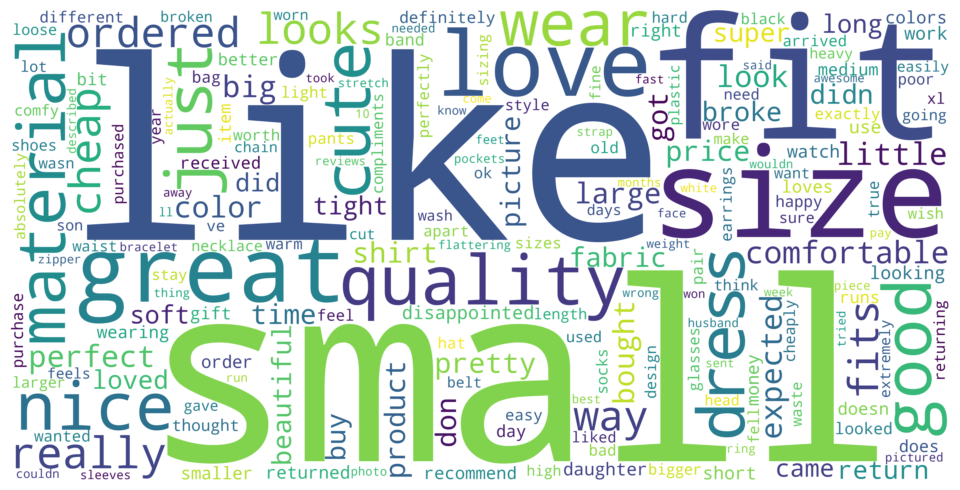

In [10]:
# Sum the TF-IDF scores for each term across all documents
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # .A1 flattens the matrix into an array

# Create a dictionary of words and their corresponding TF-IDF scores
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# Generate the word cloud
wordcloud = WordCloud(width=4000, height=2000, background_color='white', colormap='viridis').generate_from_frequencies(tfidf_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('Plots/wordcloud.pdf', format='pdf', dpi=1000)
plt.show()

### Word Clouds by Sentiment

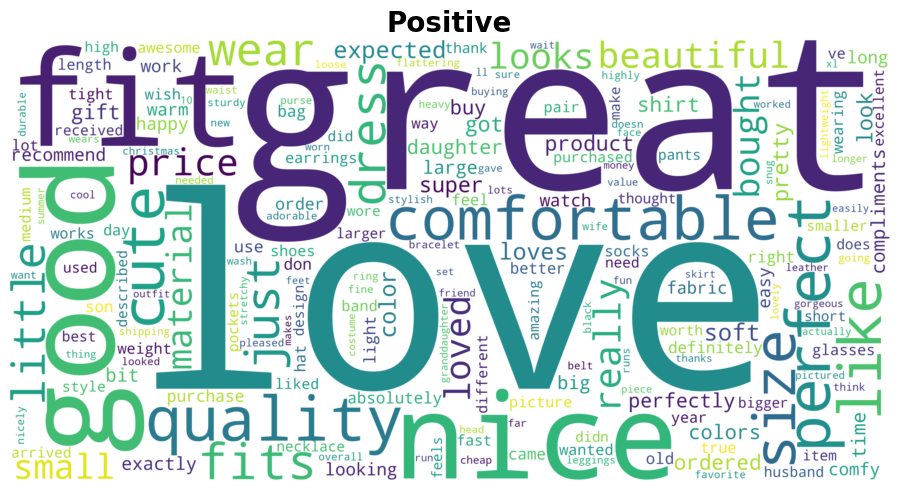

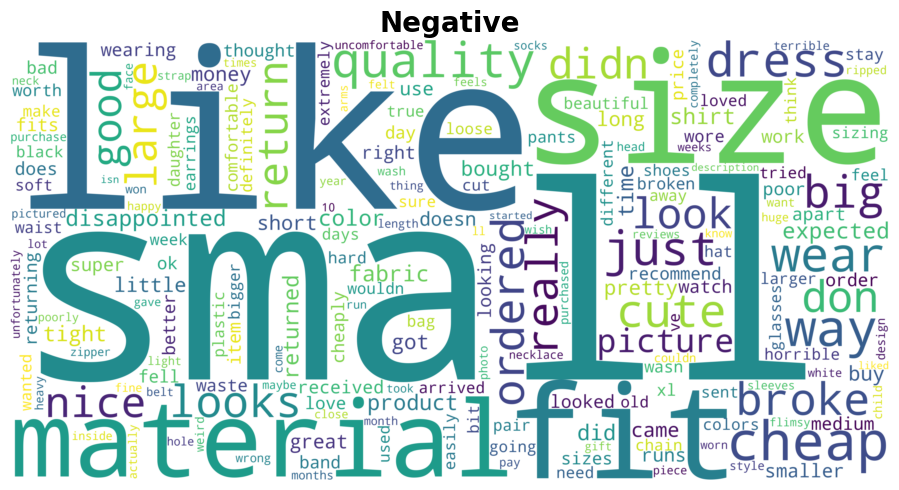

In [11]:
# Function to generate a word cloud for a specific sentiment
def generate_wordcloud_for_sentiment(df, column, value):
    # Filter the DataFrame for the selected sentiment
    sentiment_data = df[df[column] == value]
    
    # Combine all documents in the filtered DataFrame into one text block
    documents = sentiment_data['text']
    
    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
    
    # Fit and transform the documents
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    # Get the feature names (terms)
    feature_names = vectorizer.get_feature_names_out()
    
    # Sum the TF-IDF scores for each term
    tfidf_scores = tfidf_matrix.sum(axis=0).A1  # .A1 flattens the matrix
    
    # Create a dictionary mapping words to their corresponding TF-IDF scores
    tfidf_dict = dict(zip(feature_names, tfidf_scores))
    
    # Generate the word cloud
    wordcloud = WordCloud(width=4000, height=2000, background_color='white').generate_from_frequencies(tfidf_dict)
    
    # Display and save the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    if column == 'label':
        if value == 1:
            plt.title('Positive', weight='bold', fontsize=20)
        else:
            plt.title('Negative', weight='bold', fontsize=20)
    else:
        plt.title(f'Rating: {value}', weight='bold', fontsize=20)
    plt.axis('off')
    plt.tight_layout()
    if column == 'label':
        if value == 1:
            plt.savefig('Plots/wordcloud_pos.pdf', format='pdf', dpi=1000)
        else:
            plt.savefig('Plots/wordcloud_neg.pdf', format='pdf', dpi=1000)
    else:
        plt.savefig(f'Plots/wordcloud_rating{value}.pdf', format='pdf', dpi=1000)
    plt.show()

# Generate word clouds for positive and negative sentiments
generate_wordcloud_for_sentiment(reviews_sample, 'label', 1) # positive
generate_wordcloud_for_sentiment(reviews_sample, 'label', 0) # negative

### Word Clouds by Rating

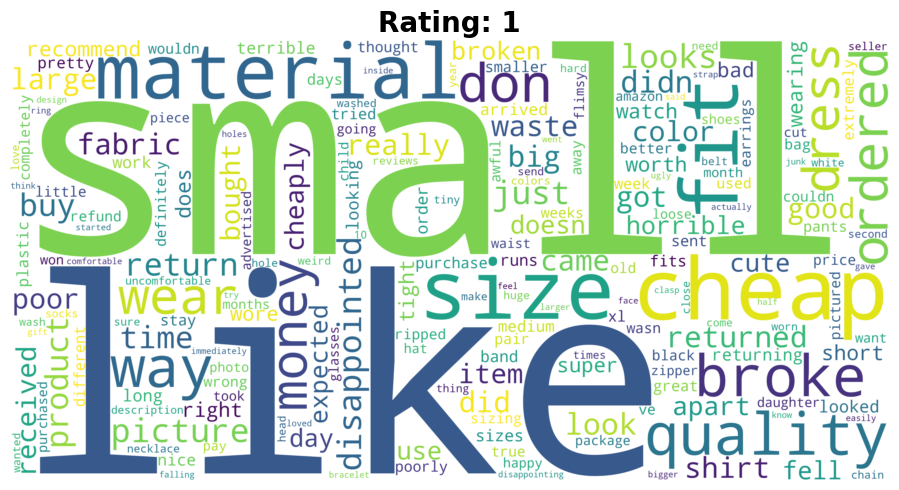

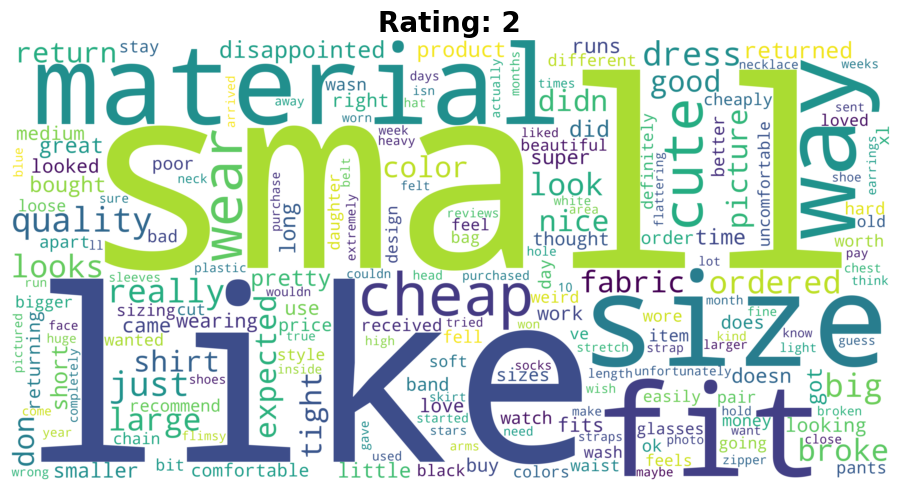

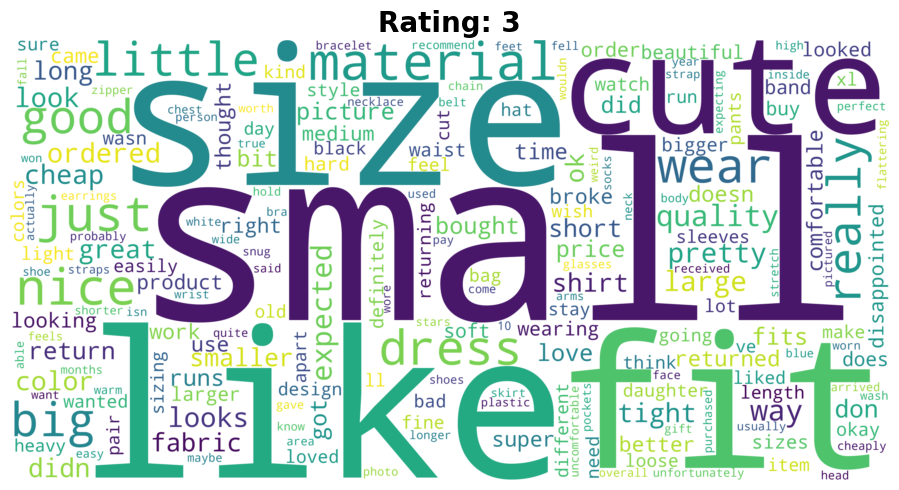

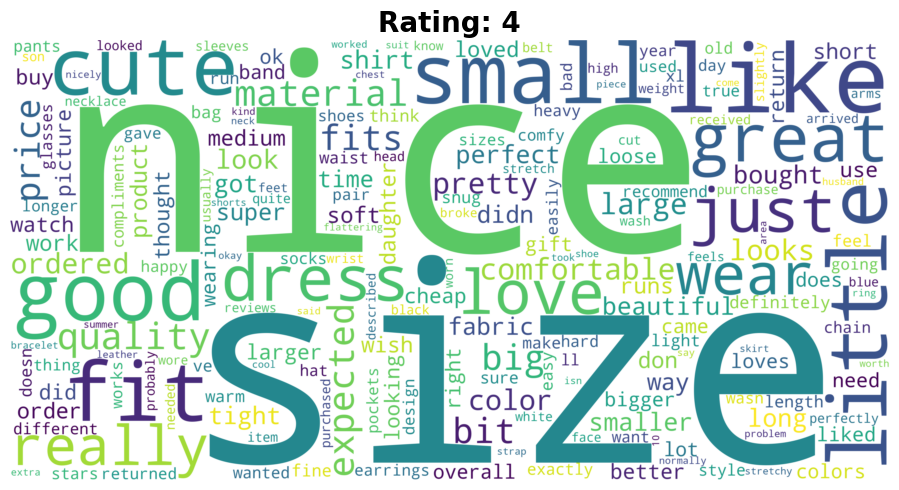

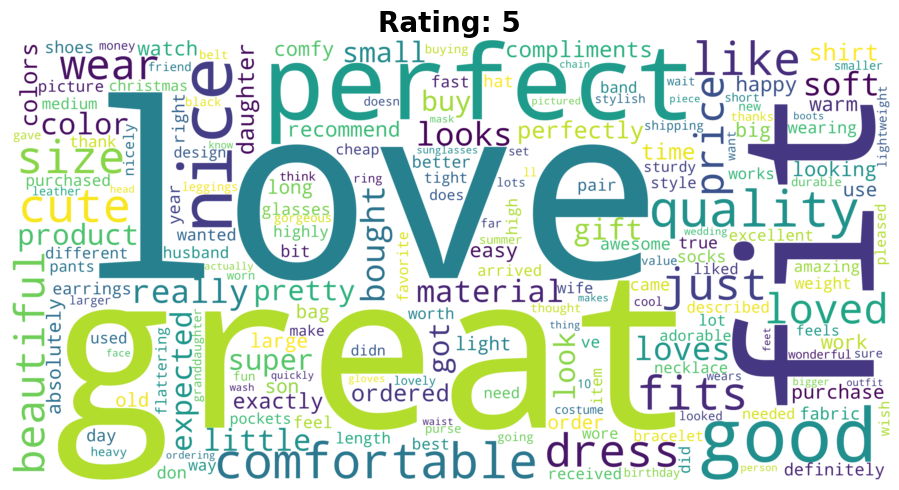

In [12]:
# Generate word clouds for all ratings
generate_wordcloud_for_sentiment(reviews_sample, 'rating', 1)
generate_wordcloud_for_sentiment(reviews_sample, 'rating', 2)
generate_wordcloud_for_sentiment(reviews_sample, 'rating', 3)
generate_wordcloud_for_sentiment(reviews_sample, 'rating', 4)
generate_wordcloud_for_sentiment(reviews_sample, 'rating', 5)

## Topic Modeling using BERTopic

--> see the Notebook [topic_modeling.ipynb](https://github.com/valentin-velev29/DLSS-24-GPT-2-Project) for topic modelling

In [28]:
# Results
with ZipFile('Data/bertopic.zip', 'r') as zip:
        # Topic modelling with review content
        with zip.open('text_topics.csv') as file:
                text_topics = pd.read_csv(file) 
                file.close()
                
display(text_topics)        

,Topic,Count,Name,Representation,Representative_Docs
0,0,79159,0_like_size_fit_small,"['like', 'size', 'fit', 'small', 'dress', 'wea...","[""I bought a bunch of these T-shirts because I..."
1,1,4107,1_glasses_sunglasses_lenses_lens,"['glasses', 'sunglasses', 'lenses', 'lens', 'p...","[""UPDATE: after using the lenses for some time..."
2,2,4387,2_broke_apart_one_broken,"['broke', 'apart', 'one', 'broken', 'clasp', '...",['Do not waste your money on these. While they...
3,3,5324,3_quality_product_gift_item,"['quality', 'product', 'gift', 'item', 'great'...","['good product. good price. fast delivery', 'L..."
4,4,1567,4_smell_bag_like_smells,"['smell', 'bag', 'like', 'smells', 'odor', 'wa...","[""I am SO disappointed! The bag itself is beau..."
5,5,875,5_easy_put_hard_use,"['easy', 'put', 'hard', 'use', 'get', 'difficu...","['Easy to put on and off', ""These definitely l..."
6,6,1241,6_size_studs_small_piercing,"['size', 'studs', 'small', 'piercing', 'fit', ...",['I am very happy with these. Only issue was t...
7,7,1010,7_expected_ok_nothing_exactly,"['expected', 'ok', 'nothing', 'exactly', 'like...","['Nothing to say but all as expected.', ""It's ..."
8,8,867,8_work_works_product_worked,"['work', 'works', 'product', 'worked', 'batter...","[""I received this last Monday and gave to my h..."
9,9,263,9_videoid_links_love_thank,"['videoid', 'links', 'love', 'thank', 'remove'...",['[[VIDEOID:b875453a5dbee07a27e30f2b9be247fc]]...
